In [1]:
import Post_Donors_PreProcess

In [2]:
import GPy
import GPyOpt
import numpy as np

In [3]:
import lightgbm as lgbm
from sklearn.metrics import roc_auc_score

In [ ]:
#Post_Donor_PrePro : Preprocessing function that pulls from the original data
#Diet : Pull from a previously saved preprocessed csv, as to only do scaling and text processing

In [ ]:
#X, y, df_cols, le_dict = Post_Donors_PreProcess.Post_Donor_PrePro(
#                            Tf_Features=100, Sample=1, 
#                            One_Hot=False, Standard_Scale=True)

In [ ]:
X, y, df_cols, le_dict = Post_Donors_PreProcess.Diet_Prepro(
                            Tf_Features=100, 
                            One_Hot=False, 
                            Standard_Scale=True)

Encoding
Scaling
Text Processing


In [ ]:
lgbm_train_data = lgbm.Dataset(data=X#.drop('School Percentage Free Lunch',axis=1)
                               ,label=y)

In [ ]:
X.head()

In [ ]:
y.value_counts(normalize=True)

## Default

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
model = lgbm.LGBMClassifier()
model.fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

## Random Search

In [11]:
from sklearn.model_selection import RandomizedSearchCV

In [12]:
model = lgbm.LGBMClassifier(
    boosting_type = 'dart',
    application= 'binary',
    learning_rate= 0.01,
    scale_pos_weight= 2,
    drop_rate= 0.2,)

In [13]:
params_rand2 = {'n_estimators': [x for x in range(50,200,20)],
             'feature_fraction': [x / 1000.0 for x in range(820,900,20)],
             'bagging_fraction': [x / 1000.0 for x in range(820,900,20)],
             'lambda_l2' : [x / 100.0 for x in range(0,310,10)],

             'boosting_type': ['dart','gbdt']}

In [14]:
params_rand = {'num_leaves': [x for x in range(10,40)],
             'max_depth': [x for x in range(10,40)],
             'feature_fraction': [x / 1000.0 for x in range(820,900,20)],
             'bagging_fraction': [x / 1000.0 for x in range(820,900,20)],
             'lambda_l2' : [x / 100.0 for x in range(0,310,10)],

             'boosting_type': ['dart','gbdt']}

In [15]:
rs = RandomizedSearchCV(
    model, 
    params_rand2, 
    n_iter=5,
    scoring='roc_auc',
    cv=5)

rs.fit(X,y)

 /Users/Nahel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
 /Users/Nahel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
 /Users/Nahel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
 /Users/Nahel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:The truth value of an empty array is ambiguous. Returning False, but in

 /Users/Nahel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
 /Users/Nahel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
 /Users/Nahel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
 /Users/Nahel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:The truth value of an empty array is ambiguous. Returning False, but in

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=LGBMClassifier(application='binary', boosting_type='dart', class_weight=None,
        colsample_bytree=1.0, drop_rate=0.2, learning_rate=0.01,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        scale_pos_weight=2, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1),
          fit_params=None, iid=True, n_iter=5, n_jobs=1,
          param_distributions={'n_estimators': [50, 70, 90, 110, 130, 150, 170, 190], 'feature_fraction': [0.82, 0.84, 0.86, 0.88], 'bagging_fraction': [0.82, 0.84, 0.86, 0.88], 'lambda_l2': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0], 'boosting_type': ['dart', 'gbdt']},
          pre_dispatch='2*n

In [16]:
rs.best_score_

0.7352987545325556

In [17]:
rs.best_params_

{'bagging_fraction': 0.84,
 'boosting_type': 'dart',
 'feature_fraction': 0.82,
 'lambda_l2': 0.4,
 'n_estimators': 150}

## Bay Search

In [56]:
params_bay = [{'name': 'feature_fraction','type': 'continuous', 'domain': (0.05,0.9)},
              {'name': 'bagging_fraction','type': 'continuous', 'domain': (0.05,0.9)},
              {'name': 'lambda_l2',       'type': 'continuous', 'domain': (0.0001,0.5)},
             
             {'name': 'n_estimators',      'type': 'discrete',   'domain': (100,300)},
             # {'name': 'num_leaves',      'type': 'discrete',   'domain': (30,50)},
             # {'name': 'max_depth' ,      'type': 'discrete',   'domain': (30,50)},
             ]

In [57]:
def Bay_Wrapper(x):
    """
    Model Wrapper for Bay Opt 
    Wrapper used for LGBM & Bay:
    x[0][:] = list of all params for this aq
    """
    AUC = True
    if AUC: metric = 'auc'
    else: metric = 'binary_logloss'
    
    lgbm_params = { 'feature_fraction': x[0][0],
                    'bagging_fraction': x[0][1],
                    'lambda_l2' : x[0][2],
                    'boosting': 'dart',
                   
                   
                    'n_estimators' : int(x[0][3]),
                    #'num_leaves': int(x[0][3]),
                    'max_depth': -1,
                                 #int(x[0][4]),
                   
                    'application': 'binary',
                    'learning_rate': 0.01,
                    'scale_pos_weight': 2,
                    'drop_rate': 0.2,
}

    cv_results = lgbm.cv(train_set=lgbm_train_data,
                         params=lgbm_params, 
                         nfold=5,
                         num_boost_round = 600,
                         early_stopping_rounds=50,
                         metrics=[metric])

    optimum_boost_rounds = np.argmax(cv_results[metric+'-mean'])
    print('{} : {}'.format(metric,np.max(cv_results['{}-mean'.format(metric)])))
    
    return np.max(cv_results[metric+'-mean'])

In [58]:
bay = GPyOpt.methods.BayesianOptimization(Bay_Wrapper,
                                          params_bay,
                                          acquisition_type ='EI',   # LCB acquisition
                                          acquisition_weight = .5,  # Exploration exploitation
                                          maximize=True
                                         )
bay.run_optimization(0) #GPyOpt uses 5 points + the number listed
print('Function after 5 Aquisitions')
bay.plot_acquisition()

auc : 0.6905105606256574
auc : 0.6791723108739861
auc : 0.6825434889796627
auc : 0.6905722980512842
auc : 0.6904674918118718
Function after 5 Aquisitions


In [59]:
bay.run_optimization(10)
bay.plot_convergence()

auc : 0.6900544088818054
auc : 0.6887181306028201
auc : 0.6908119321416761
auc : 0.6966259110115293


KeyboardInterrupt: 

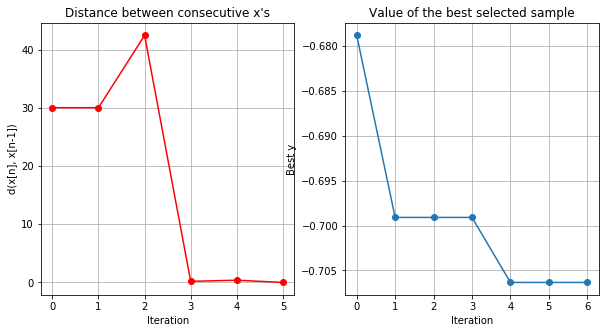

In [23]:
bay.run_optimization(10)
bay.plot_convergence()

In [55]:
bay_pred

array([  0.80741979,   0.37163167,   0.47805398, 200.        ])

In [54]:
bay_pred = bay.x_opt
print('num_leaves : '+str(int(bay_pred[0])))
print('max_depth: '+str(int(bay_pred[1])))
print('feature_fraction: '+str(round(bay_pred[2],5)))
print('bagging_fraction: '+str(round(bay_pred[3],5)))
print('lambda_l2: '+str(round(bay_pred[4],5)))

num_leaves : 0
max_depth: 0
feature_fraction: 0.47805
bagging_fraction: 200.0


IndexError: index 4 is out of bounds for axis 0 with size 4

In [25]:
lgbm_params = { 'boosting': 'dart',
                'application': 'binary',
                'learning_rate': 0.01,
                'scale_pos_weight': 2,
                'drop_rate': 0.2,
                'num_leaves': int(bay_pred[0]),
                'max_depth': int(bay_pred[1]),
                'feature_fraction': bay_pred[2],
                'bagging_fraction': bay_pred[3],
                'lambda_l2' : bay_pred[4]}

cv_results = lgbm.cv(train_set=lgbm_train_data,
                     params=lgbm_params, 
                     nfold=5,
                     num_boost_round=600,
                     early_stopping_rounds=50,
                     #metrics=['accuracy']
                    )
#'binary_logloss-mean'
optimum_boost_rounds = np.argmax(cv_results['binary_logloss-mean'])
print('Auc : {}'.format(np.max(cv_results['binary_logloss-mean'])))

KeyboardInterrupt: 